In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.models.MultyModalGPT2 import MultyModalGPT2
from src.data.shemas import ConfigData, ConfigTraining
from src.data.datasets import AlfredDataset
from src.pipelines.train_pipeline import train_loop

from torch.optim import AdamW
import matplotlib.pyplot as plt

In [3]:
train_cfg = ConfigTraining(
    train_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/train/",
    test_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/valid_seen/",
    epoch_num=10,
    data_samples_num=500
)

cfg = ConfigData(
    device="cuda",
    train_cfg=train_cfg
)

In [4]:
train_dataset = AlfredDataset(cfg, promt_type="task2next_step")
test_dataset = AlfredDataset(cfg, dataset_type="test", promt_type="task2next_step")

In [5]:
train_dataset[0]

{'promts': ['<|endoftext|>Task: pick up the alarm clock and turn on the lamp.. Your previous actions: . What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp.. Your previous actions: lookdown. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp.. Your previous actions: lookdown. moveahead. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp.. Your previous actions: lookdown. moveahead. moveahead. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp.. Your previous actions: lookdown. moveahead. moveahead. rotateleft. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and turn on the lamp.. Your previous actions: lookdown. moveahead. moveahead. rotateleft. lookup. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: pick up the alarm clock and

In [6]:
mmgpt = MultyModalGPT2(cfg)
mmgpt.train()
# mmgpt.set_bias_training()
opt = AdamW(mmgpt.get_trainable_params())

In [7]:
train_dataset[94]

{'promts': ['<|endoftext|>Task: turn a lamp on and pick up a book.. Your previous actions: . What is you next step?<|endoftext|>',
  '<|endoftext|>Task: turn a lamp on and pick up a book.. Your previous actions: lookdown. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: turn a lamp on and pick up a book.. Your previous actions: lookdown. rotateright. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: turn a lamp on and pick up a book.. Your previous actions: lookdown. rotateright. moveahead. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: turn a lamp on and pick up a book.. Your previous actions: lookdown. rotateright. moveahead. lookdown. What is you next step?<|endoftext|>',
  '<|endoftext|>Task: turn a lamp on and pick up a book.. Your previous actions: lookdown. rotateright. moveahead. lookdown. toggleobjecton. What is you next step?<|endoftext|>'],
 'images_features': None,
 'targets': ['lookdown',
  'rotateright',
  'moveahead',
  'lookdown',
  'to

In [8]:
history = train_loop(mmgpt, train_dataset, test_dataset, opt, cfg)

Epoch 1/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 2/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 3/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 4/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 5/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 6/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 7/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 8/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 9/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 10/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

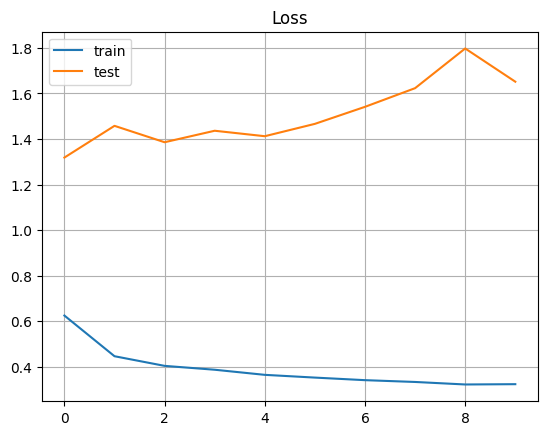

In [9]:
plt.title("Loss")
plt.plot(history["train_loss"], label="train")
plt.plot(history["test_loss"], label="test")
plt.grid()
plt.legend()

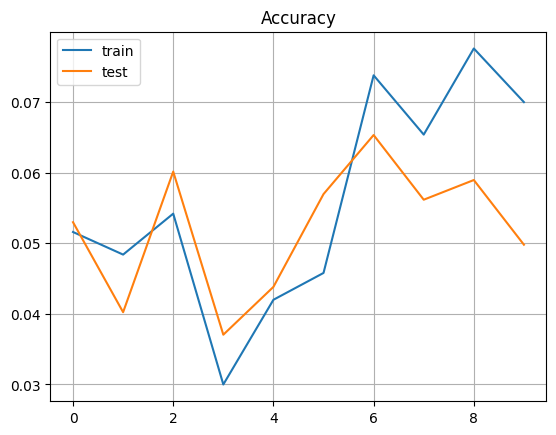

In [10]:
plt.title("Accuracy")
plt.plot(history["train_acc"], label="train")
plt.plot(history["test_acc"], label="test")
plt.grid()
plt.legend()

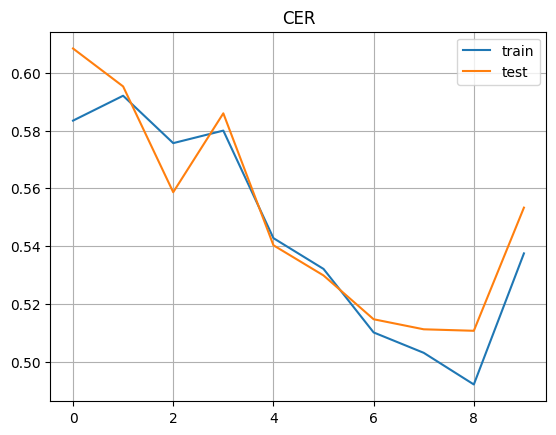

In [11]:
plt.title("CER")
plt.plot(history["train_cer"], label="train")
plt.plot(history["test_cer"], label="test")
plt.grid()
plt.legend()

In [12]:
history

{'train_loss': [0.625026026159525,
  0.44644445618987083,
  0.4041221339404583,
  0.38712144967913625,
  0.36468951439857483,
  0.3526329814195633,
  0.341327627748251,
  0.3334428492486477,
  0.3224051476120949,
  0.32371435171365737],
 'train_acc': [0.0516,
  0.0484,
  0.054200000000000005,
  0.03,
  0.042,
  0.04580000000000001,
  0.07379999999999999,
  0.0654,
  0.07759999999999999,
  0.07],
 'train_cer': [0.5834404,
  0.5920599,
  0.575651,
  0.579987,
  0.5427563,
  0.5320965,
  0.51011,
  0.5030517,
  0.49209094,
  0.53747106],
 'test_loss': [1.3185917367616973,
  1.4578843350666928,
  1.3859016198323542,
  1.4363183487815212,
  1.412343467374247,
  1.466575016063523,
  1.541319359405582,
  1.6232923621912876,
  1.797519474568595,
  1.6516928061308613],
 'test_acc': [0.05298804780876494,
  0.0402390438247012,
  0.060159362549800796,
  0.03705179282868526,
  0.043824701195219126,
  0.056972111553784864,
  0.0653386454183267,
  0.05617529880478088,
  0.05896414342629482,
  0.04980